Realizar el ajuste o ajustes de los modelos

Sacad la matriz de confusión de vuestro modelo e identificad cuáles son los verdaderos positivos, verdaderos negativos, falsos positivos y falsos negativos.

In [1]:
# Tratamiento de datos
# -----------------------------------------------------------------------
import numpy as np
import pandas as pd

# Gráficos
# ------------------------------------------------------------------------------
import matplotlib.pyplot as plt
import seaborn as sns


#  Modelado y matriz de confusión
# ------------------------------------------------------------------------------
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix


#  Gestión de warnings
# ------------------------------------------------------------------------------
import warnings
warnings.filterwarnings("ignore")

# MODELO 50-50:

In [2]:
df_travel_balanceado = pd.read_csv("data/df_travel_balanceado.csv", index_col= 0)
df_travel_balanceado.sample()

,Unnamed: 0,Duration,Net Sales,Age,products,agency,country,Commision_oe,Agency Type_oe,Distribution Channel_Offline,Distribution Channel_Online,Claim
36870,31199,0.068013,-0.03838,-0.873881,0,1,0,1,0,0.0,1.0,0


In [3]:
# creamos un df (x) con las variables predictivas y un dataframe (y) que tiene sólo la variable respuesta:

X = df_travel_balanceado.drop("Claim", axis = 1)
y = df_travel_balanceado["Claim"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [4]:
# definimos la regresión logistica

log_reg_esta = LogisticRegression(n_jobs=-1, max_iter = 1000)

# ajustamos el modelo
log_reg_esta.fit(X_train,y_train)

# obtenemos las predicciones para el conjunto de entrenamiento
y_pred_train_esta = log_reg_esta.predict(X_train)

# obtenemos las predicciones para el conjunto de test
y_pred_test_esta = log_reg_esta.predict(X_test)

In [5]:
train_df_esta = pd.DataFrame({'Real': y_train, 'Predicted': y_pred_train_esta, 'Set': ['Train']*len(y_train)})
test_df_esta  = pd.DataFrame({'Real': y_test,  'Predicted': y_pred_test_esta,  'Set': ['Test']*len(y_test)})
resultados = pd.concat([train_df_esta,test_df_esta], axis = 0)
display(resultados.head())
display(resultados.tail())

,Real,Predicted,Set
56497,1,1,Train
42895,1,1,Train
30853,0,1,Train
53304,1,1,Train
2513,0,1,Train


,Real,Predicted,Set
27109,0,1,Test
47529,1,1,Test
2313,0,1,Test
70344,1,1,Test
22153,0,1,Test


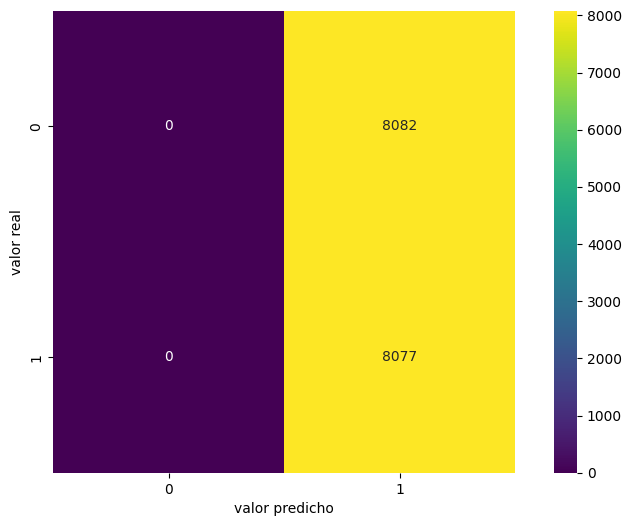

In [6]:
# sacamos la matriz de confusión:

matriz_confusion = confusion_matrix(y_test, y_pred_test_esta)

plt.figure(figsize = (10, 6))
sns.heatmap(matriz_confusion, square=True, annot=True, fmt="d", cmap = "viridis")

plt.xlabel('valor predicho')
plt.ylabel('valor real')
plt.show()

CONCLUSIONES:

0 = no reclaman

1 = sí reclaman

Verdaderos Negativos (el modelo predice que no reclaman y efectivamente no reclaman): 7023

Verdaderos Positivos (el modelo predice que reclaman y efectivamente reclaman): 5351

Falsos Positivos (el modelo predice que reclaman pero no lo hacen): 1452

Falsos Negativos (el modelo predice que no reclaman pero sí lo hacen): 3116

# MODELO 60-40:

In [11]:
df_travel_balanceado_b = pd.read_csv("data/df_travel_balanceado_b.csv")
df_travel_balanceado_b.sample()

,Unnamed: 0.1,Unnamed: 0,Duration,Net Sales,Age,products,agency,country,Commision_oe,Agency Type_oe,Distribution Channel_Offline,Distribution Channel_Online,Claim
24586,24586,27750,-0.575074,0.296037,-0.270547,0,0,0,0,0,0.0,1.0,0


In [8]:
A = df_travel_balanceado_b.drop("Claim", axis = 1)
b = df_travel_balanceado_b["Claim"]

A_train, A_test, b_train, b_test = train_test_split(A, b, test_size = 0.2, random_state = 42)

# definimos la regresión logistica

log_reg_b = LogisticRegression(n_jobs=-1, max_iter = 1000)

# ajustamos el modelo
log_reg_b.fit(A_train,b_train)

# obtenemos las predicciones para el conjunto de entrenamiento
b_pred_train_b = log_reg_b.predict(A_train)

# obtenemos las predicciones para el conjunto de test
b_pred_test_b = log_reg_b.predict(A_test)

In [ ]:
train_df_b = pd.DataFrame({'Real': b_train, 'Predicted': b_pred_train_b, 'Set': ['Train']*len(b_train)})
test_df_b  = pd.DataFrame({'Real': b_test,  'Predicted': b_pred_test_b,  'Set': ['Test']*len(b_test)})
resultados_b = pd.concat([train_df_b,test_df_b], axis = 0)
display(resultados_b.head())
display(resultados_b.tail())

,Real,Predicted,Set
22667,0,0,Train
14014,0,0,Train
32070,0,0,Train
6670,0,0,Train
9205,0,0,Train


,Real,Predicted,Set
39513,1,0,Test
51679,1,0,Test
32295,0,0,Test
31640,0,0,Test
32617,0,0,Test


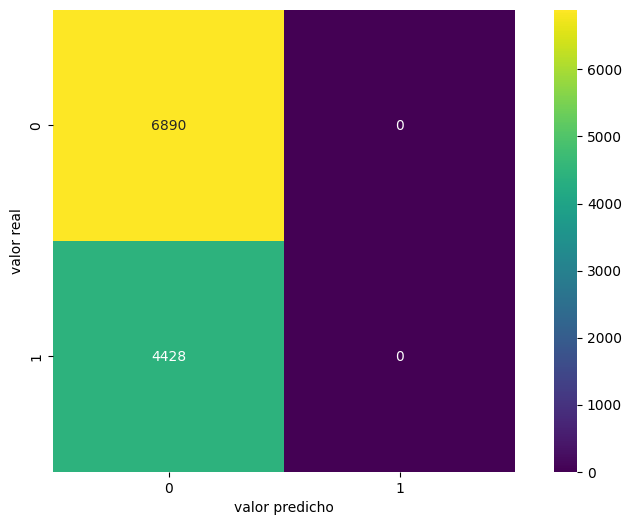

In [ ]:
# sacamos la matriz de confusión:

matriz_confusion_b = confusion_matrix(b_test, b_pred_test_b)

plt.figure(figsize = (10, 6))
sns.heatmap(matriz_confusion_b, square=True, annot=True, fmt="d", cmap = "viridis")

plt.xlabel('valor predicho')
plt.ylabel('valor real')
plt.show()

CONCLUSIONES:

0 = no reclaman

1 = sí reclaman

Verdaderos Negativos (el modelo predice que no reclaman y efectivamente no reclaman): 0

Verdaderos Positivos (el modelo predice que reclaman y efectivamente reclaman): 8077

Falsos Positivos (el modelo predice que reclaman pero no lo hacen): 8082

Falsos Negativos (el modelo predice que no reclaman pero sí lo hacen): 0

# MODELO 3: test

In [ ]:
df_travel_ = pd.read_csv("data/df_travel_balanceado_b.csv", index_col=0)
df_travel.sample()

NameError: name 'df_travel' is not defined